In [7]:
# load mnist data with pytorch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
# keep only subset of data for training
# trainset.data = trainset.data[:100]

trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
testloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = tuple(str(i) for i in range(10))

# show some images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()




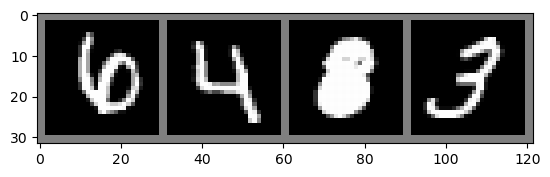

    6     4     8     3


In [8]:
# visualize some images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [9]:
len(trainloader)

15000

In [10]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data, Batch

# turn mnist data into graph data
def mnist_to_graph(data, edge_index):
    x, y = data
    x = x.view(-1, 28*28)
    return Data(x=x, edge_index=edge_index, y=y)


In [11]:
coordinates_to_index = lambda i, j: i*28+j
edge_index = []
for i in range(28):
    for j in range(28):
        if i+1<28:
            edge_index.append([coordinates_to_index(i, j), coordinates_to_index(i+1, j)])
        if j+1<28:
            edge_index.append([coordinates_to_index(i, j), coordinates_to_index(i, j+1)])
        if i-1>=0:
            edge_index.append([coordinates_to_index(i, j), coordinates_to_index(i-1, j)])
        if j-1>=0:
            edge_index.append([coordinates_to_index(i, j), coordinates_to_index(i, j-1)])
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

In [12]:
edge_index.shape

torch.Size([2, 3024])

In [13]:
train_graphs = [mnist_to_graph(data, edge_index) for data in trainset]

In [14]:
train_graph_loader = DataLoader(train_graphs, batch_size=4, shuffle=True)

In [15]:
for batch in train_graph_loader:
    print(batch)
    break

DataBatch(x=[4, 784], edge_index=[2, 12096], y=[4], batch=[4], ptr=[5])


In [18]:
batch.x.shape

torch.Size([4, 784])

In [51]:
# load reddit binary

from torch_geometric.datasets import Reddit
dataset = Reddit(root='./data')
data = dataset[0]
